# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Membaca dataset
df = pd.read_csv('emails.csv', encoding='latin1')

# Melihat 5 baris pertama untuk memahami struktur data
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
print(f"Jumlah baris dan kolom: {df.shape}")
df.info()

Jumlah baris dan kolom: (2255, 3002)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2255 entries, 0 to 2254
Columns: 3002 entries, Email No. to Prediction
dtypes: float64(1747), int64(1254), object(1)
memory usage: 51.6+ MB


Prediction
0.0    1618
1.0     636
Name: count, dtype: int64


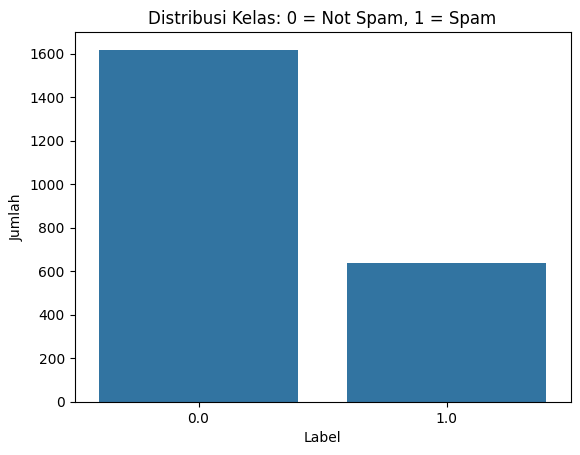

In [4]:
print(df['Prediction'].value_counts())
sns.countplot(x='Prediction', data=df)
plt.title('Distribusi Kelas: 0 = Not Spam, 1 = Spam')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

In [5]:
df.describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
the,2255.0,6.413304,11.468927,0.0,1.0,3.0,7.0,210.0
to,2255.0,6.067849,9.518129,0.0,1.0,3.0,7.0,132.0
ect,2255.0,6.571619,19.001356,1.0,1.0,2.0,5.0,344.0
and,2255.0,2.874945,5.631021,0.0,0.0,1.0,3.0,83.0
for,2255.0,3.218625,4.751557,0.0,1.0,2.0,4.0,39.0
of,2255.0,2.444789,5.533911,0.0,0.0,1.0,2.0,77.0
a,2255.0,57.062528,93.459903,0.0,12.0,28.0,63.0,1898.0
you,2255.0,2.509091,4.461188,0.0,0.0,1.0,3.0,49.0
hou,2255.0,2.646563,9.240773,0.0,0.0,0.0,2.0,167.0
in,2255.0,10.382262,18.224403,0.0,1.0,5.0,11.0,223.0


In [6]:
print("Missing value per kolom:\n", df.isnull().sum().sort_values(ascending=False).head())
print("Total duplikasi data:", df.duplicated().sum())

Missing value per kolom:
 Prediction    1
dry           1
ff            1
allowing      1
military      1
dtype: int64
Total duplikasi data: 0


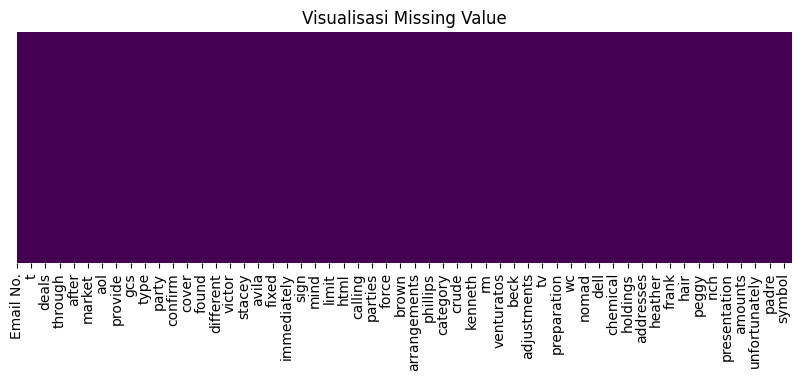

In [7]:
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Visualisasi Missing Value')
plt.show()

In [8]:
print("Distribusi label sebelum handle missing value:")
print(df['Prediction'].value_counts(dropna=False))

Distribusi label sebelum handle missing value:
Prediction
0.0    1618
1.0     636
NaN       1
Name: count, dtype: int64


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [9]:
# Hapus baris yang mengandung missing value
df = df.dropna()

In [10]:
# Hapus data duplikat
df = df.drop_duplicates()
print("Jumlah data setelah hapus duplikat:", df.shape)

Jumlah data setelah hapus duplikat: (2254, 3002)


In [11]:
print("Jumlah missing value setelah hapus duplikat:", df.isnull().sum().sum())

Jumlah missing value setelah hapus duplikat: 0


In [12]:
# Hapus Kolom Identitas
if 'Email No.' in df.columns:
    df = df.drop(columns=['Email No.'])

In [13]:
# Label Numerik
df['Prediction'] = df['Prediction'].astype(int)

In [14]:
# Pisahin Fitur dan Lavel
X = df.drop('Prediction', axis=1)
y = df['Prediction']

In [15]:
# Normalisasi/Standarisasi Fitur Numerik

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

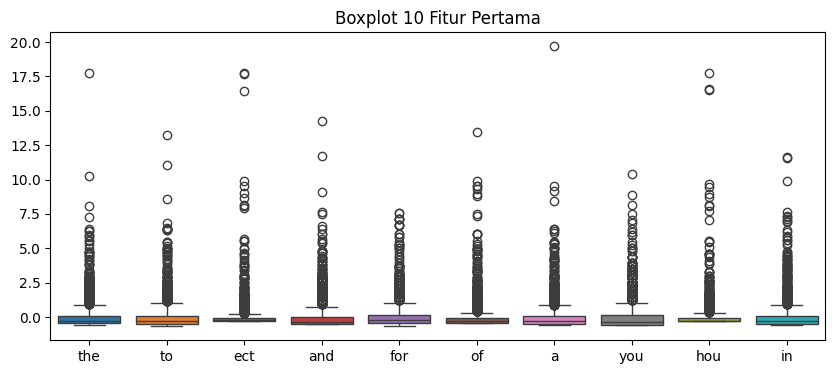

In [16]:
# Cek Outlier pakai Boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
sns.boxplot(data=X.iloc[:, :10])
plt.title('Boxplot 10 Fitur Pertama')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Ukuran data latih:", X_train.shape, "| Data uji:", X_test.shape)

Ukuran data latih: (1803, 3000) | Data uji: (451, 3000)


In [18]:
# Pilih & Latih Model (Baseline)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0     0.9663    0.9722    0.9692       324
           1     0.9280    0.9134    0.9206       127

    accuracy                         0.9557       451
   macro avg     0.9471    0.9428    0.9449       451
weighted avg     0.9555    0.9557    0.9555       451

[[315   9]
 [ 11 116]]


In [20]:
# Ekspor Hasil Preprocessing
df.to_csv('notebook_preprocessing.csv', index=False)
print("Hasil preprocessing berhasil diekspor ke notebook_preprocessing.csv")

Hasil preprocessing berhasil diekspor ke notebook_preprocessing.csv
